In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("income.csv")

In [5]:
df.head(3)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000


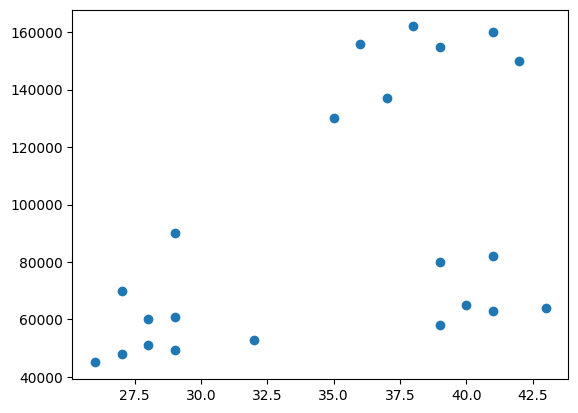

In [7]:
plt.scatter(df["Age"],df["Income($)"])
plt.show()

In [8]:
model = KMeans(n_clusters=3)

In [11]:
res = model.fit_predict(df[["Age","Income($)"]])

In [12]:
df["cluster"] = res
df.head(10)

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


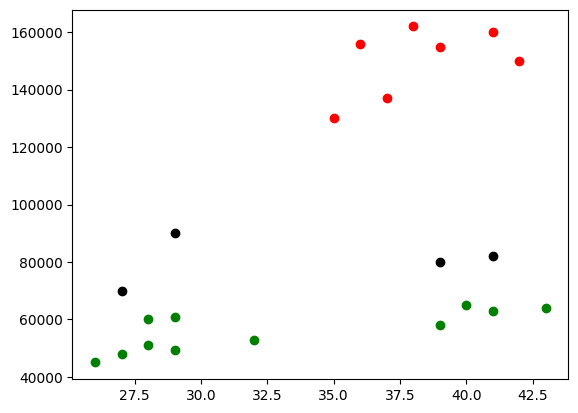

In [17]:
df1 = df[df["cluster"]==0]
df2 = df[df["cluster"]==1]
df3 = df[df["cluster"]==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.show()

In [21]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head(5)

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [25]:
scaler.fit(df[["Age"]])
df.Age = scaler.transform(df[["Age"]])
df.drop("Name",axis="columns",inplace=True)

In [26]:
df.head(5)

,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


In [30]:
res = model.fit_predict(df[["Age","Income($)"]])
df["cluster"] = res


In [34]:
centre = model.cluster_centers_
centre

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

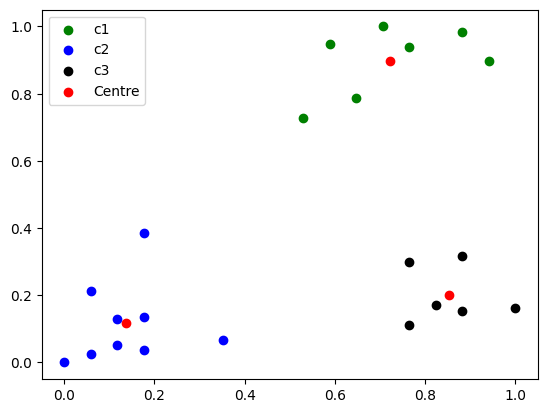

In [43]:
df1 = df[df["cluster"]==0]
df2 = df[df["cluster"]==1]
df3 = df[df["cluster"]==2]

plt.scatter(df1.Age,df1['Income($)'],color='green',label="c1")
plt.scatter(df2.Age,df2['Income($)'],color='blue',label="c2")
plt.scatter(df3.Age,df3['Income($)'],color='black',label="c3")
plt.scatter(centre[:,0],centre[:,1],c="r",label = "Centre")
plt.legend()
plt.show()

In [44]:
model.inertia_

0.47507834985530945